# ZOMATO EDA     
#### By Mayank Prajapati

### Introduction
Exploratory Data Analysis (EDA) is a preliminary step of Machine Learning and is used extensively in this field. Although it is not necessary to perform EDA to build models, but it is definitely recommended as it helps to know the data better. If performed correctly, it gives us insights which are not easy to witness directly.

In this notebook, I have performed a detailed analysis on the Indian Restaurants Dataset from Zomato. Following are the things that you will learn from this project:

1. Basic composition of data
2. Removing duplicates
3. Dealing with missing values
4. Understanding features
5. Plotting horizontal bar charts (multicolor)
6. Using groupby, apply, and unique functions
7. Scatter plot
8. Word Cloud
9. Box plot
12. Drawing insights and conclusions from data

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random
from wordcloud import WordCloud

### Importing Dataset

In [2]:
df = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\zomato_data.csv")


### Exploring Data

In [3]:
df.head(10)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
5,3400275,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-civi...,"114/23 G, Deep Shikha Complex, Sanjay Place, C...",Agra,34,Civil Lines,27.201516,78.007556,...,2,Rs.,"['Credit Card', 'Lunch', 'Delivery', 'Dinner',...",4.0,Very Good,707,62,0.0,-1,-1
6,3400296,Honeydew Restaurant,['Quick Bites'],https://www.zomato.com/agra/honeydew-restauran...,"Opposite Soami Bagh Temple, Dayal Bagh, Agra",Agra,34,Dayal Bagh,27.222175,78.010174,...,2,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",4.2,Very Good,647,46,0.0,1,-1
7,3400368,Domino's Pizza,['Quick Bites'],https://www.zomato.com/agra/dominos-pizza-sika...,"Plot C-1/6, Sector 13, Sikandra, Agra",Agra,34,Sikandra,27.203930,77.954260,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'No Alcoh...",3.8,Good,617,18,0.0,-1,-1
8,3401284,Cake House,['Bakery'],https://www.zomato.com/agra/cake-house-2-civil...,"23/301, Wazirpura Rd, Judge Compound Chowraha,...",Agra,34,Civil Lines,27.204148,78.009025,...,2,Rs.,"['Takeaway Available', 'Cash', 'Indoor Seating...",3.4,Average,322,14,0.0,1,-1
9,3400838,Sugar N Thyme,['Café'],https://www.zomato.com/agra/sugar-n-thyme-tajg...,"1374 K/1375 K, Ground floor, Dinesh Nagar, Fat...",Agra,34,Tajganj,27.158243,78.045591,...,3,Rs.,"['No Alcohol Available', 'Dinner', 'Delivery',...",4.4,Very Good,289,324,0.0,1,-1


In [4]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [5]:
df.city.nunique()

99

In [6]:
df.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [7]:
df.shape

(211944, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [9]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


#### info( ) is used to know about count, null and type properties, describe( ) gives us statistical information about numerical data.

In [10]:
df.drop_duplicates(["res_id"],keep='first',inplace=True)
df.shape

(55568, 26)

In [11]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [12]:
df["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [13]:
print(df["establishment"].unique()[1])
print(type(df["establishment"].unique()[1]))

['Casual Dining']
<class 'str'>


In [14]:
df['establishment'] = df['establishment'].str.replace(r'\[|\]', '', regex=True)
df['establishment'] = df['establishment'].str.replace("'", '', regex=False)
print(df["establishment"].unique()[1])

Casual Dining


In [15]:
print(df["establishment"].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [16]:
df['establishment'] = df['establishment'].replace('', 'NA')
print(df["establishment"].unique())

['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [17]:
len(df[df["city"]=="Bhopal"])

906

In [18]:
len(df[df["city"]=="Indore"])

1026

In [19]:
len(df["city"].unique())

99

In [20]:
df["city"].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [21]:
df[df["city"]=="Bhopal"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
24601,2600230,Manohar Dairy And Restaurant,Quick Bites,https://www.zomato.com/bhopal/manohar-dairy-an...,"132, Zone 1, Maharana Pratap Nagar, Bhopal",Bhopal,26,Maharana Pratap Nagar,23.234256,77.434070,...,2,Rs.,"['Dinner', 'Lunch', 'Delivery', 'Breakfast', '...",4.8,Excellent,1450,466,0.0,1,-1
24602,2600499,Zam Zam Fast Food,Casual Dining,https://www.zomato.com/bhopal/zam-zam-fast-foo...,"Hamidia Road, Besides Alpan Cinema, Peer Gate ...",Bhopal,26,Peer Gate Area,23.264345,77.409945,...,2,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",4.3,Very Good,1124,60,0.0,1,-1
24603,2600334,Sagar Gaire Fast Food,Quick Bites,https://www.zomato.com/bhopal/sagar-gaire-fast...,"Shop 33-34,Ground Floor, Platinum Plaza, TT N...",Bhopal,26,TT Nagar,23.227220,77.401557,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.6,Excellent,1591,90,0.0,-1,-1
24604,18812768,Anni Bhai ki Biryani,Quick Bites,https://www.zomato.com/bhopal/anni-bhai-ki-bir...,"Shop 1, Qazi Camp, Next to Taj Studio, JP Naga...",Bhopal,26,JP Nagar,23.272252,77.401907,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'No Al...",4.5,Excellent,543,6,0.0,1,-1
24605,2600051,Al-Beik,Quick Bites,https://www.zomato.com/bhopal/al-beik-2-mahara...,"Al- Beik -5 , Plot No: 9, Ram Gopal Maheshwar...",Bhopal,26,Maharana Pratap Nagar,23.234292,77.434670,...,1,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.3,Very Good,1144,44,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27037,18936737,Gupta Ji Burger Center And Fast Food,Quick Bites,https://www.zomato.com/bhopal/gupta-ji-burger-...,"10, Hawkers Corner, State Bank, Arera Colony, ...",Bhopal,26,Arera Colony,23.213691,77.436325,...,2,Rs.,"['Delivery', 'Lunch', 'Takeaway Available', 'N...",3.7,Good,19,5,0.0,1,-1
27040,18855526,Spicy Fast Food Center,Quick Bites,https://www.zomato.com/bhopal/spicy-fast-food-...,"Shop 9, Bandhan Shadi Hall, Karond, Airport Ar...",Bhopal,26,Airport Area,23.300940,77.404137,...,1,Rs.,"['Dinner', 'Delivery', 'Lunch', 'Cash', 'Takea...",3.7,Good,31,5,0.0,1,-1
27187,18813682,Royal Kitchen Indian Restaurant,Casual Dining,https://www.zomato.com/bhopal/royal-kitchen-in...,"Nayapura New Central Jail, Airport Road, Airpo...",Bhopal,26,Airport Area,23.301217,77.373904,...,2,Rs.,"['Delivery', 'Lunch', 'Takeaway Available', 'D...",3.6,Good,53,11,0.0,1,-1
27195,18789478,Hakeem Hotel,Casual Dining,https://www.zomato.com/bhopal/hakeem-hotel-bhe...,"7, Minal Gate 1, J.K Road, Ayodhya Road, BHEL,...",Bhopal,26,BHEL,23.267170,77.457964,...,2,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",3.6,Good,93,4,0.0,1,-1


In [22]:
df[df["city"]=="Indore"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
79621,18625117,Namo Sandwich,Quick Bites,https://www.zomato.com/indore/namo-sandwich-1-...,"610, Narendra Tiwari Marg, Usha Nagar, Sudama ...",Indore,14,Sudama Nagar,22.696331,75.834857,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.3,Very Good,860,244,0.0,-1,-1
79622,1400096,Bake N Shake,Café,https://www.zomato.com/indore/bake-n-shake-vij...,"Shop 3 & 4, Giriraj Grande, Satya Sai Square, ...",Indore,14,"BCM Heights, Vijay Nagar",22.755705,75.895287,...,2,Rs.,"['Dinner', 'Mall Parking', 'Delivery', 'Credit...",4.2,Very Good,683,357,0.0,-1,-1
79623,1400382,Shree Gurukripa,Casual Dining,https://www.zomato.com/indore/shree-gurukripa-...,"13, Choti Gwaltoli, Sarwate Bus Stand, Indore",Indore,14,Sarwate Bus Stand,22.714090,75.868851,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.3,Very Good,2030,72,0.0,-1,-1
79624,1400056,Nafees Restaurant,Casual Dining,https://www.zomato.com/indore/nafees-restauran...,"30-B, Apollo Avenue, Opposite Palasia Thana",Indore,14,Old Palasia,22.725712,75.887757,...,3,Rs.,"['Credit Card', 'No Alcohol Available', 'Dinne...",4.3,Very Good,2987,336,0.0,-1,-1
79625,1400365,Hotel Guru Kripa,Quick Bites,https://www.zomato.com/indore/hotel-guru-kripa...,"Mahatma Gandhi Road, Murai Mohalla, Chhawni, S...",Indore,14,Sarwate Bus Stand,22.714086,75.868846,...,2,Rs.,"['Dinner', 'Cash', 'Breakfast', 'Lunch', 'Take...",4.3,Very Good,3441,151,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82504,1402460,Galliyara Restaurant,Casual Dining,https://www.zomato.com/indore/galliyara-restau...,"Scheme 94, Plot ED 143, Sector D, Ring Road, V...",Indore,14,Khajrana,22.736165,75.902475,...,2,Rs.,"['Lunch', 'Cash', 'Delivery', 'Credit Card', '...",3.8,Good,171,23,0.0,1,-1
82506,18717049,Tadka Laga,NA,https://www.zomato.com/indore/tadka-laga-vijay...,"Shop 1975, Scheme 114, part 1, Niranjanpur Roa...",Indore,14,Vijay Nagar,22.771956,75.888286,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Deli...",3.6,Good,100,3,0.0,-1,-1
82537,18702710,The Urban Gumti,NA,https://www.zomato.com/indore/the-urban-gumti-...,"312, Krishna Bagh Colony. Behind Barfani Dhaam...",Indore,14,Vijay Nagar,22.740677,75.897397,...,2,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",3.5,Good,33,9,0.0,-1,-1
82565,1402107,Arora's Central Kitchen,NA,https://www.zomato.com/indore/aroras-central-k...,"G-1, 108, Simran Regency, Sarv Suvidha Nagar,...",Indore,14,By Pass Road (North),22.717378,75.911992,...,2,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Delivery', '...",3.9,Good,217,27,0.0,-1,-1


In [23]:
df[df["city"]=="Pune"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,11283,Harajuku - The O Hotel,Fine Dining,https://www.zomato.com/pune/harajuku-the-o-hot...,"The O Hotel, North Main Road, Koregaon Park, Pune",Pune,5,"The O Hotel, Koregaon Park",18.540239,73.887518,...,4,Rs.,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,10663,Mix@36 - The Westin,Lounge,https://www.zomato.com/pune/mix@36-the-westin-...,"The Westin, Survey 36/3B, KP Annexe Mundhwa Ro...",Pune,5,"The Westin, Mundhwa",18.540040,73.905910,...,4,Rs.,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,10743,Kangan - The Westin,Fine Dining,https://www.zomato.com/pune/kangan-the-westin-...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539455,73.906040,...,4,Rs.,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,18938162,Palette - The Westin,Fine Dining,https://www.zomato.com/pune/palette-the-westin...,"The Westin, 36/3B, KP Annexe, Mundhwa Road, Mu...",Pune,5,"The Westin, Mundhwa",18.539430,73.906009,...,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,18310167,Coriander Kitchen - Conrad Pune,Fine Dining,https://www.zomato.com/pune/coriander-kitchen-...,"Conrad, Mangaldas Road, Bund Garden Road, Pune",Pune,5,"Conrad Pune, Bund Garden Road",18.535409,73.883592,...,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168657,6508050,Parsi Dhaba,Casual Dining,https://www.zomato.com/pune/parsi-dhaba-lonava...,"Della Adventure & Resorts, Kunegaon",Pune,5,Della Adventure Resort,18.781294,73.390452,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.3,Very Good,517,148,0.0,-1,-1
168658,13775,Sheetal Da Dhaba,Bar,https://www.zomato.com/pune/sheetal-da-dhaba-l...,"Mumbai Pune Road, At Karla, Lonavala, Pune",Pune,5,Lonavala,18.761606,73.458489,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Delivery', 'Debit...",3.8,Good,580,787,0.0,-1,-1
168659,13061,Lonavla Restaurant & Bar- Hotel Lonavla,Casual Dining,https://www.zomato.com/pune/lonavla-restaurant...,"Gawlinaka, Mumbai-Pune Highway, Lonavala, Pune",Pune,5,Lonavala,18.754747,73.405682,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.3,Very Good,474,81,0.0,-1,-1
168660,18555341,Utopia,Casual Dining,https://www.zomato.com/pune/utopia-lonavala?ut...,"CTS 159, Old Mumbai-Pune Road, Lonavala, Pune",Pune,5,Lonavala,18.754342,73.402737,...,3,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,336,204,0.0,-1,-1


In [24]:
df["locality"].nunique()

3731

In [25]:
df["country_id"].unique()

array([1], dtype=int64)

In [26]:
df["locality_verbose"].nunique()

3910

In [27]:
print(df["cuisines"].nunique())
print(df["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [28]:
df["cuisines"] = df["cuisines"].fillna("No cuisine")

In [29]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


In [30]:
df["average_cost_for_two"].nunique()

145

In [31]:
df["price_range"].unique()

array([2, 1, 3, 4], dtype=int64)

In [32]:
print(df["highlights"].nunique())
print(df["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [33]:
hl = []
df["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


In [34]:
df[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


In [35]:
df["opentable_support"].unique()

array([ 0., nan])

In [36]:
df["delivery"].unique()

array([-1,  1,  0], dtype=int64)

In [37]:
df["takeaway"].unique()

array([-1], dtype=int64)

In [38]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                    0
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [39]:
# Drop multiple columns
columns_to_drop = ["url","address", "zipcode","latitude","longitude","country_id","timings","opentable_support","delivery","takeaway"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [40]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
city                    0
city_id                 0
locality                0
locality_verbose        0
cuisines                0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
dtype: int64

### Restaurant chains
Here chains represent restaurants with more than one outlet

Chains vs Outlets

In [41]:
outlets = df["name"].value_counts()

In [42]:
outlets

Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: name, Length: 41100, dtype: int64

In [43]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [44]:
df.shape

(55568, 16)

In [45]:
chains

Domino's Pizza              399
Cafe Coffee Day             315
KFC                         204
Baskin Robbins              202
Keventers                   189
                           ... 
Santoor Restaurant            2
The Ice House                 2
Zaatar Arabic Restaurant      2
Ashok & Ashok Meat Dhaba      2
Hotel Tara                    2
Name: name, Length: 4890, dtype: int64

In [46]:
print("Total Restaurants = ", df.shape[0])
print("Total Restaurants that are part of some chain = ", df.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((df.shape[0] - single.shape[0]) / df.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


In [47]:
chains.head(10)

Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: name, dtype: int64

In [48]:

top10_chains = df["name"].value_counts()[:10].sort_values(ascending=True)

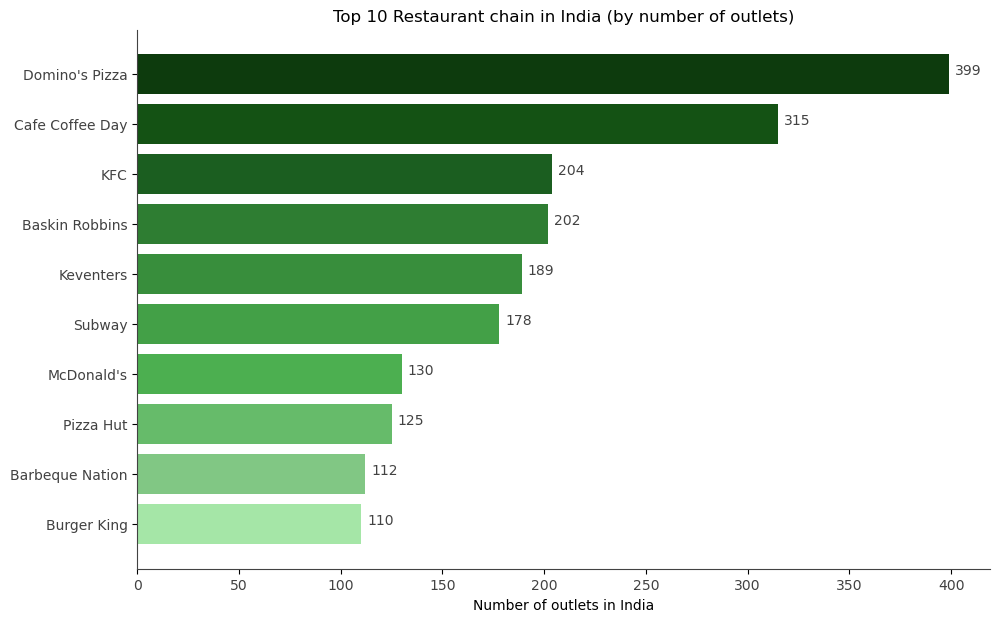

In [49]:
import matplotlib.pyplot as plt
import numpy as np

height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11, 7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

# Use different shades of green for the bars
colors = ["#a5e6a7", "#81c784", "#66bb6a", "#4caf50", "#43a047", "#388e3c", "#2e7d32", "#1b5e20", "#145214", "#0d3b0d"]

plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 3, i, str(v), color='#424242')

plt.title("Top 10 Restaurant chain in India (by number of outlets)")

plt.show()


This chart is majorly dominaed by big fast food chains

Top restaurant chains (by average rating)
Here we will look at top chains by their ratings. I have set the criteria of number of outlets to greater than 4 to remove some outliers.

In [50]:
outlets = df["name"].value_counts()


In [51]:
atleast_5_outlets = outlets[outlets > 4]


In [52]:
top10_chains2 = df[df["name"].isin(atleast_5_outlets.index)].groupby("name").mean(numeric_only=True)["aggregate_rating"].sort_values(ascending=False)[:10].sort_values(ascending=True)

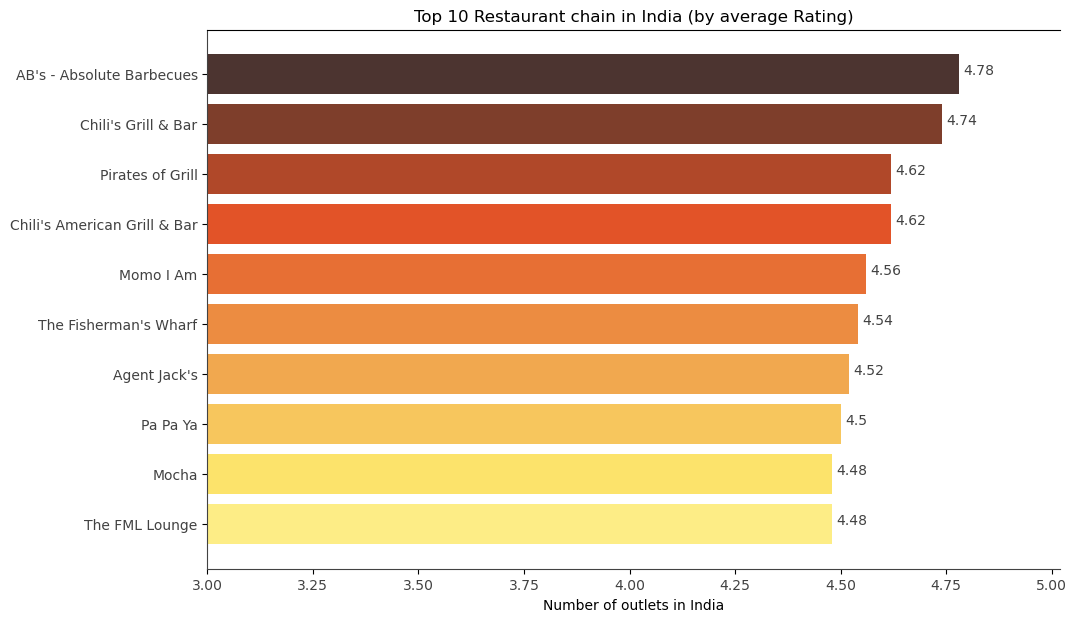

In [53]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")


plt.show()

Interestingly, no fast food chain appears in this chart. To maintain a high rating, restaurants needs to provide superior service which becomes impossible with booming fast food restaurant in every street.

### Establishment Types
Number of restaurants (by establishment type)

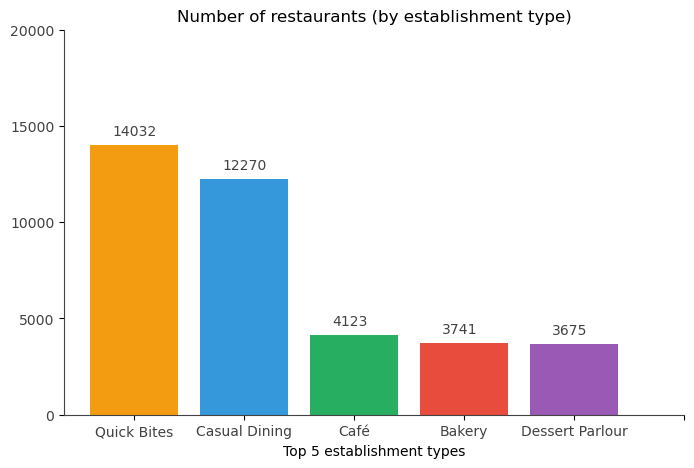

In [54]:
est_count = df.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f39c12", '#3498db', "#27ae60", "#e74c3c", "#9b59b6"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

In [55]:
rating_by_est = df.groupby("establishment").mean(numeric_only=True)["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_est

establishment
Microbrewery     4.268182
Pub              3.758263
Cocktail Bar     3.531250
Fine Dining      3.436547
Lounge           3.436463
Club             3.378571
Irani Cafe       3.321429
Casual Dining    3.238680
Café             3.212345
Butcher Shop     3.110390
Name: aggregate_rating, dtype: float64

In [56]:
# To check the number of outlets in each of the above establishment type, uncomment to following code

#est_count = df.groupby("establishment").count()["name"].sort_values(ascending=False)
#rating_by_est_map = est_count.index.isin(rating_by_est.index)
#est_count = est_count[rating_by_est_map][rating_by_est.index]
#est_count

In [57]:
df.groupby("establishment").mean(numeric_only=True)["votes"].sort_values(ascending=False)[:10]

establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64

In [58]:
df.groupby("establishment").mean(numeric_only=True)["photo_count"].sort_values(ascending=False)[:10]

establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64

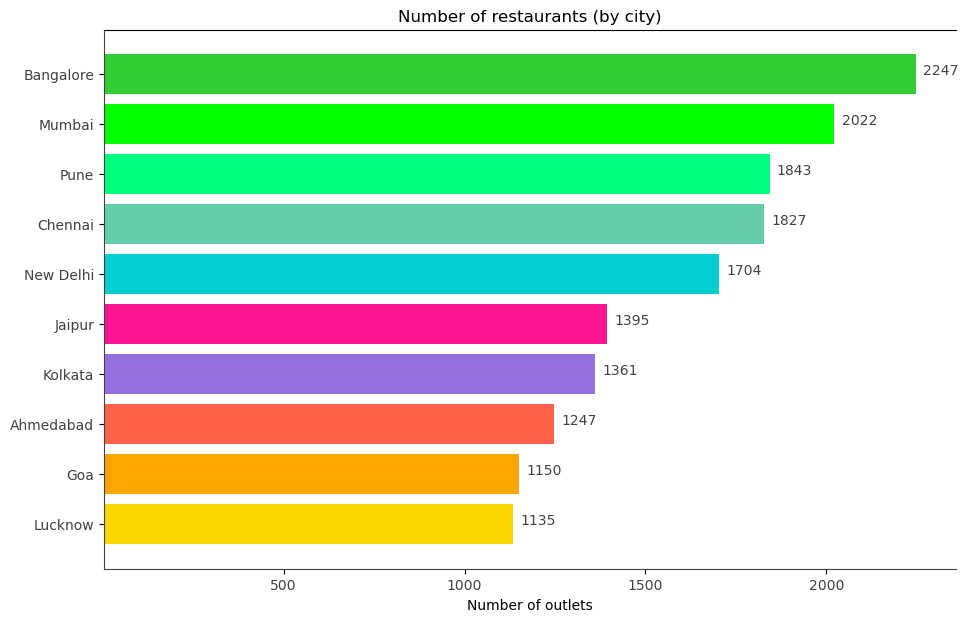

In [59]:
city_counts = df.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#FFD700', '#FFA500', '#FF6347', '#9370DB','#FF1493','#00CED1', 
          '#66CDAA','#00FF7F', '#00FF00', '#32CD32']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()


As expected, metro cities have more number of restaurants than others with South India dominating the Top 4

In [60]:
rating_by_city = df.groupby("city").mean(numeric_only=True)["aggregate_rating"].sort_values(ascending=False)[:10]
rating_by_city

city
Gurgaon         3.828525
Secunderabad    3.822222
Hyderabad       3.755839
Kolkata         3.751947
New Delhi       3.727347
Mumbai          3.709298
Bangalore       3.698175
Noida           3.620307
Chennai         3.597701
Pune            3.509224
Name: aggregate_rating, dtype: float64

In [61]:
# To check the number of outlets in each of the above establishment type

#city_count = data.groupby("city").count()["name"].sort_values(ascending=False)
#rating_by_city_map = city_count.index.isin(rating_by_city.index)
#city_count = city_count[rating_by_city_map][rating_by_city.index]
#city_count

In [62]:
df.groupby("city").mean(numeric_only =True)["votes"].sort_values(ascending=False)[:10]

city
Hyderabad       955.549878
Secunderabad    955.433333
Mumbai          797.158259
Bangalore       724.940365
New Delhi       711.116197
Kolkata         615.706833
Gurgaon         613.180328
Noida           515.570881
Pune            475.715681
Navi Mumbai     443.342995
Name: votes, dtype: float64

In [63]:
df.groupby("city").mean(numeric_only=True)["photo_count"].sort_values(ascending=False)[:10]

city
Mumbai         882.273492
New Delhi      764.258216
Gurgaon        678.491803
Kolkata        667.558413
Navi Mumbai    547.323671
Thane          514.963855
Noida          492.291188
Bangalore      462.287939
Hyderabad      377.274939
Pune           333.320130
Name: photo_count, dtype: float64

Gurgaon has highest rated restaurants whereas Hyderabad has more number of critics. Mumbai and New Delhi dominates for most photo uploads per outlet

In [64]:
print("Total number of unique cuisines = ", cuisines.nunique())

Total number of unique cuisines =  134


### Number of restaurants (by cuisine)

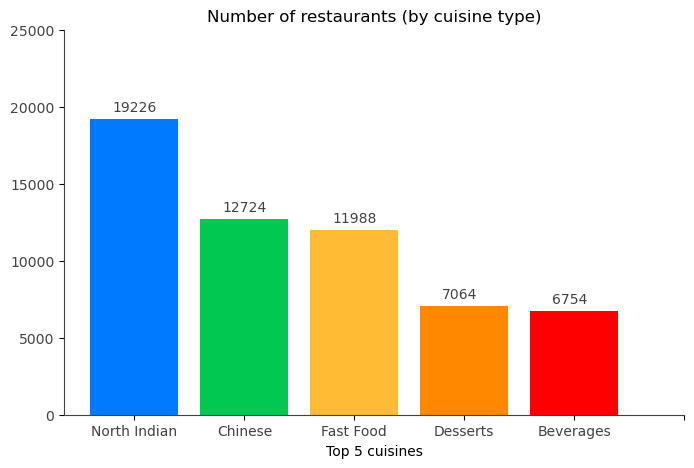

In [65]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#007bff', '#00C851', '#ffbb33', '#ff8800', '#FF0000']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

North Indian food on top and Surprisingly, Chinese food comes second in the list of cuisines that Indians prefer, even more than fast food, desserts and South Indian food

### Highest rated cuisines

In [66]:
df["cuisines2"] = df['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [67]:
for i, x in df.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j]["Total"] += 1

In [68]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


#### Highlights/Features of restaurants
Unique highlights

In [69]:
print("Total number of unique cuisines = ", hl.nunique())

Total number of unique cuisines =  104


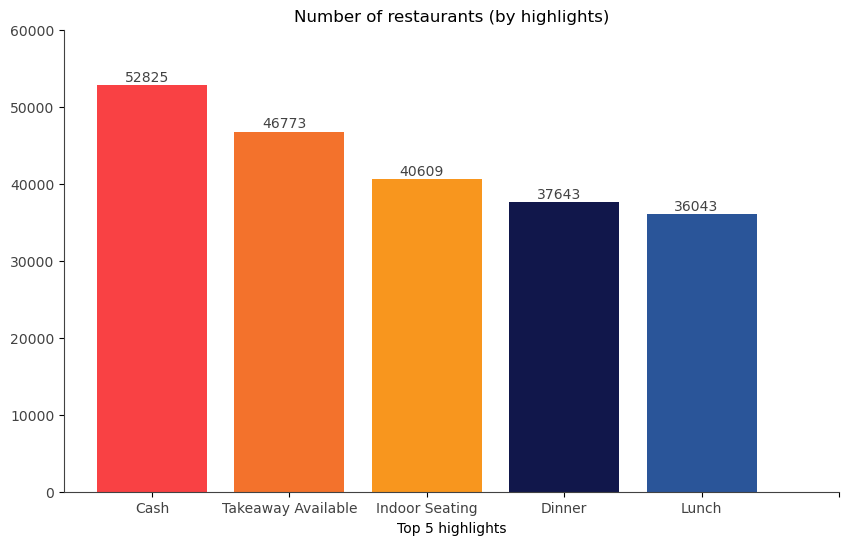

In [70]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#f94144', '#f3722c','#f8961e','#11174b', '#2a5599']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

Top 5 highlights doesn't convey much information since they are very trivial to almost every restaurant. Let's look at uncommon highlights that matter more to the customer

## Highlights wordcloud

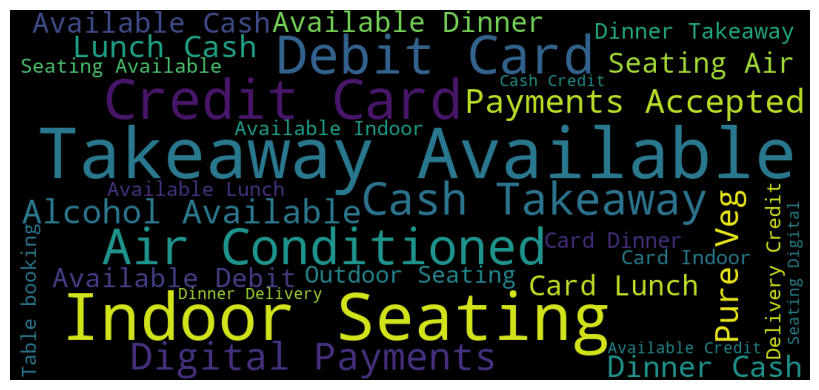

In [71]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width =1080, height = 500, 
                background_color ='Black', 
                min_font_size = 10, max_words=30).generate(hl_str) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Above we create wordcloud of top 30 highlights

### Relation between Average price for two and Rating

In [72]:
np.round(df[["average_cost_for_two","aggregate_rating"]].corr()["average_cost_for_two"][1],2)

0.25

A correlation can be seen between restaurant average cost and rating

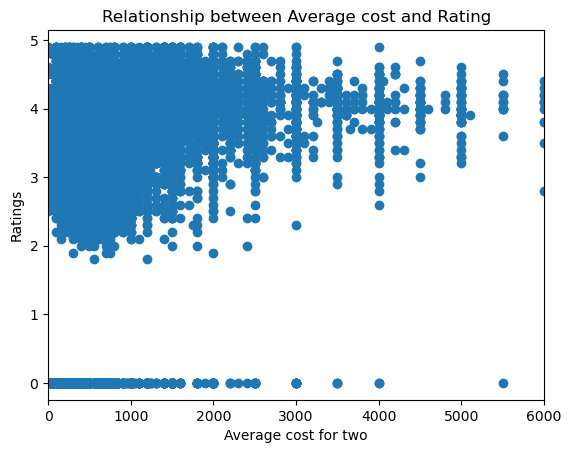

In [73]:
plt.plot("average_cost_for_two","aggregate_rating", data=df, linestyle="none", marker="o")
plt.xlim([0,6000])
plt.title("Relationship between Average cost and Rating")
plt.xlabel("Average cost for two")
plt.ylabel("Ratings")
plt.show()

There is definetely a direct relation between the two. Let's take a smaller sample to draw a clearer scatter plot.

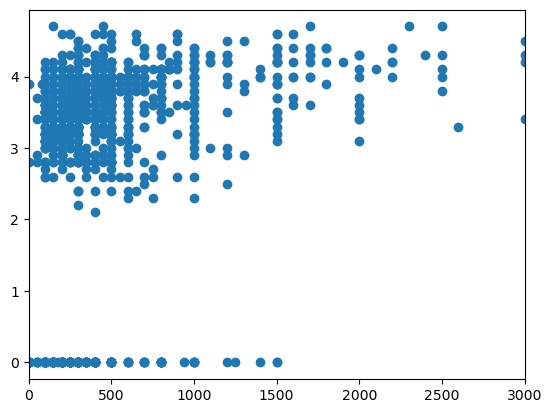

In [74]:
plt.plot("average_cost_for_two","aggregate_rating", data=df.sample(1000), linestyle="none", marker="o")
plt.xlim([0,3000])
plt.show()

This relation concludes that that as average cost for two increases, there is a better chance that the restaurant will be rated highly. Let's look at price range for a better comparison.

## Relation between Price range and Rating

In [75]:
np.round(df[["price_range","aggregate_rating"]].corr()["price_range"][1],2)

0.25

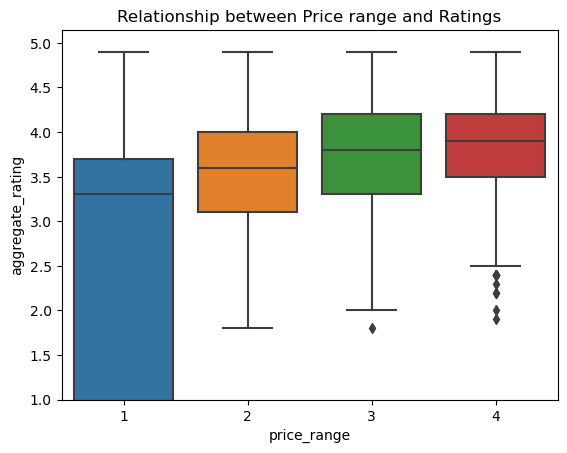

In [76]:
sns.boxplot(x='price_range', y='aggregate_rating', data=df)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.

# Conclusions
After working on this data, we can conclude the following things:-

1. Approx. 35% of restaurants in India are part of some chain
2. Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3. Barbecues and Grill food chains have highest average ratings than other type of restaurants
4. Quick bites and casual dining type of establishment have most number of outlets
5. Establishments with alcohol availability have highest average ratings, votes and photo uploads
6. Banglore has most number of restaurants
7. Gurgaon has highest rated restaurants (average 3.83) whereas Hyderabad has more number of critics (votes). 
8. Mumbai and New Delhi dominates for most photo uploads per outlet
9. After North Indian, Chinese is the most prefered cuisine in India
12. Most restaurants are rated between 3 and 4
#### Now we have come to the end of this project